In [66]:
# menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report,
    RocCurveDisplay, ConfusionMatrixDisplay
)

In [68]:
df = pd.read_csv('/content/gdrive/MyDrive/Semester 3/Matkul Machine Learning/Praktikum/4/Data/calonpembelimobil.csv')
df.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [70]:
df.isnull().sum()

,0
ID,0
Usia,0
Status,0
Kelamin,0
Memiliki_Mobil,0
Penghasilan,0
Beli_Mobil,0


In [71]:
for kolom in df.columns:
    print(f"Nilai unik kolom {kolom}: {df[kolom].unique()}")

Nilai unik kolom ID: [   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  189  190  191  192  193 

In [72]:
df = df.drop(columns=['ID'])

print("Distribusi kolom target (Beli_Mobil):")
print(df['Beli_Mobil'].value_counts())


Distribusi kolom target (Beli_Mobil):
Beli_Mobil
1    633
0    367
Name: count, dtype: int64


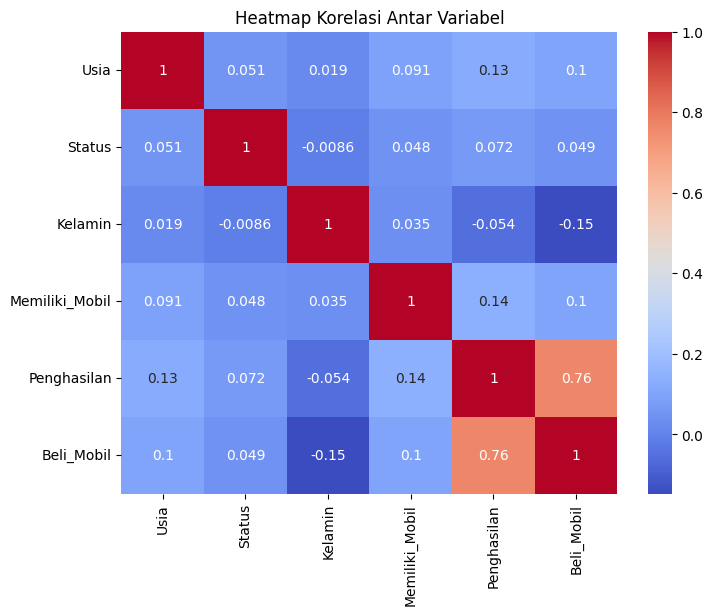

In [73]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

In [74]:
X = df[['Usia', 'Status', 'Kelamin', 'Memiliki_Mobil', 'Penghasilan']]
y = df['Beli_Mobil']

print("Ukuran X:", X.shape)
print("Ukuran y:", y.shape)

Ukuran X: (1000, 5)
Ukuran y: (1000,)


In [75]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Jumlah Data Training:", X_train.shape[0])
print("Jumlah Data Testing:", X_test.shape[0])

Jumlah Data Training: 800
Jumlah Data Testing: 200


In [76]:
num_features = ['Usia', 'Status', 'Kelamin', 'Memiliki_Mobil', 'Penghasilan']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features)
], remainder='passthrough')

clf = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LogisticRegression(max_iter=1000, class_weight='balanced', solver='lbfgs', random_state=42))
])

clf.fit(X_train, y_train)
print("✅ Model Logistic Regression berhasil dilatih.")

✅ Model Logistic Regression berhasil dilatih.


In [80]:
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-Score :", f1_score(y_test, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test, y_proba))


Accuracy : 0.93
Precision: 0.9829059829059829
Recall   : 0.905511811023622
F1-Score : 0.9426229508196722
ROC-AUC  : 0.976809405673606


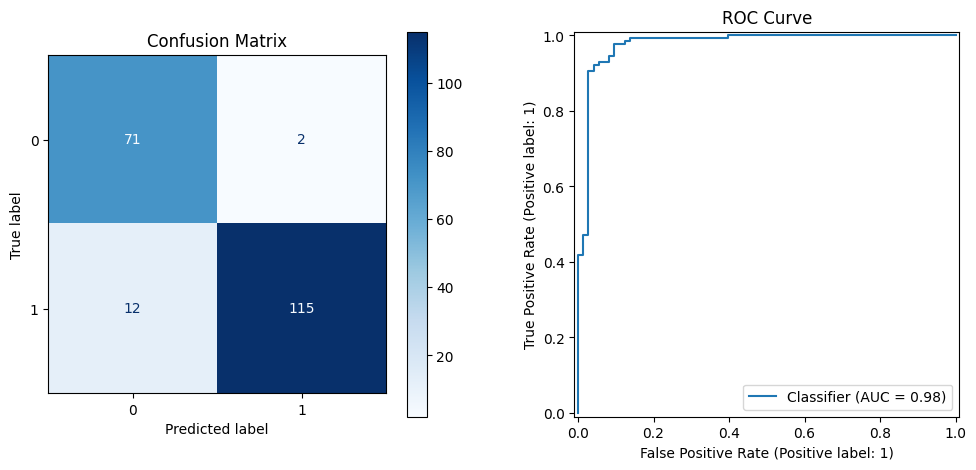

In [82]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues', ax=ax[0])
ax[0].set_title("Confusion Matrix")

RocCurveDisplay.from_predictions(y_test, y_proba, ax=ax[1])
ax[1].set_title("ROC Curve")

plt.show()

In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        73
           1       0.98      0.91      0.94       127

    accuracy                           0.93       200
   macro avg       0.92      0.94      0.93       200
weighted avg       0.94      0.93      0.93       200



In [89]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)

print("Skor tiap fold:", scores)
print("Rata-rata akurasi:", np.mean(scores))
print("Standar deviasi:", np.std(scores))

Skor tiap fold: [0.78  0.925 0.955 0.945 0.94 ]
Rata-rata akurasi: 0.909
Standar deviasi: 0.06522269543648128


In [92]:
feat_names = num_features
coefs = clf.named_steps['model'].coef_[0]
odds = np.exp(coefs)

coef_df = pd.DataFrame({
    'Fitur': feat_names,
    'koefisien (log-odds)': coefs,
    'odds Ratio (e^coef)': odds
}).sort_values('odds Ratio (e^coef)', ascending=False)

display(coef_df)

,Fitur,koefisien (log-odds),odds Ratio (e^coef)
4,Penghasilan,4.568333,96.383273
3,Memiliki_Mobil,0.078968,1.082169
0,Usia,-0.045073,0.955928
1,Status,-0.132093,0.876259
2,Kelamin,-0.596863,0.550536


In [104]:
data_baru = pd.DataFrame({
    'Usia': [30, 45],
    'Status': [4, 2],
    'Kelamin': [1, 0],
    'Memiliki_Mobil': [0, 1],
    'Penghasilan': [250, 400]
})

pred = clf.predict(data_baru)
prob = clf.predict_proba(data_baru)[:, 1]

hasil = data_baru.copy()
hasil['Prob_BeliMobil'] = prob
hasil['Prediksi'] = np.where(pred == 1, 'Beli', 'Tidak Beli')

display(hasil)

,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Prob_BeliMobil,Prediksi
0,30,4,1,0,250,0.483493,Tidak Beli
1,45,2,0,1,400,0.999826,Beli
